<a href="https://colab.research.google.com/github/aak29/aak29/blob/main/MGS314_CandleStick%20Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:

# Import all our required packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Pick ticker symbol of our stock
tkr_str = 'AAPL'
tkr = yf.Ticker(tkr_str)

In [4]:
# Get stock history for the last 30 days
tkr_history = tkr.history(period='30d')
tkr_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-06 00:00:00-04:00,145.568524,147.295654,144.979504,145.189148,68402200,0.0,0
2022-10-07 00:00:00-04:00,142.303926,142.863011,139.219047,139.857986,85925600,0.0,0
2022-10-10 00:00:00-04:00,140.187439,141.655006,138.340512,140.187439,74899000,0.0,0
2022-10-11 00:00:00-04:00,139.668307,141.115918,137.991096,138.749832,77033700,0.0,0
2022-10-12 00:00:00-04:00,138.899586,140.127544,137.931191,138.110886,70433700,0.0,0


In [5]:
# Get stock history for the last 30 days
tkr_history = tkr.history(period='30d')
tkr_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-06 00:00:00-04:00,145.568524,147.295654,144.979504,145.189148,68402200,0.0,0
2022-10-07 00:00:00-04:00,142.303926,142.863011,139.219047,139.857986,85925600,0.0,0
2022-10-10 00:00:00-04:00,140.187439,141.655006,138.340512,140.187439,74899000,0.0,0
2022-10-11 00:00:00-04:00,139.668307,141.115918,137.991096,138.749832,77033700,0.0,0
2022-10-12 00:00:00-04:00,138.899586,140.127544,137.931191,138.110886,70433700,0.0,0


In [6]:
# Reset the index so we can access the dates
tkr_history.reset_index(inplace=True)
tkr_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-10-06 00:00:00-04:00,145.568524,147.295654,144.979504,145.189148,68402200,0.0,0
1,2022-10-07 00:00:00-04:00,142.303926,142.863011,139.219047,139.857986,85925600,0.0,0
2,2022-10-10 00:00:00-04:00,140.187439,141.655006,138.340512,140.187439,74899000,0.0,0
3,2022-10-11 00:00:00-04:00,139.668307,141.115918,137.991096,138.749832,77033700,0.0,0
4,2022-10-12 00:00:00-04:00,138.899586,140.127544,137.931191,138.110886,70433700,0.0,0


In [7]:
# Check the data type of each column
tkr_history.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                               int64
dtype: object

In [8]:
# Calculate elapsed days
base_date = tkr_history['Date'][0]
tkr_history['day_num'] = tkr_history['Date'].map(lambda date:(date - base_date).days)
tkr_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_num
0,2022-10-06 00:00:00-04:00,145.568524,147.295654,144.979504,145.189148,68402200,0.0,0,0
1,2022-10-07 00:00:00-04:00,142.303926,142.863011,139.219047,139.857986,85925600,0.0,0,1
2,2022-10-10 00:00:00-04:00,140.187439,141.655006,138.340512,140.187439,74899000,0.0,0,4
3,2022-10-11 00:00:00-04:00,139.668307,141.115918,137.991096,138.749832,77033700,0.0,0,5
4,2022-10-12 00:00:00-04:00,138.899586,140.127544,137.931191,138.110886,70433700,0.0,0,6


In [9]:
# Function to draw candlestick
def draw_candlestick(axis, data, color_up, color_down):
  # Check if stock closed higher or not
  if data['Close'] > data['Open']:
    color = color_up
  else:
    color = color_down

  # Plot the candle wick
  axis.plot([data['day_num'], data['day_num']], [data['Low'], data['High']], linewidth=1.5, color='black', solid_capstyle='round', zorder=2)

  # Draw the candle body
  rect = mpl.patches.Rectangle((data['day_num'] - 0.25, data['Open']), 0.5, (data['Close'] - data['Open']), facecolor=color, edgecolor='black', linewidth=1.5, zorder=3)

  # Add candle body to the axis
  axis.add_patch(rect)
    
  # Return modified axis
  return axis

In [10]:
# Function to draw all candlesticks
def draw_all_candlesticks(axis, data, color_up='white', color_down='black'):
    for day in range(data.shape[0]):
        axis = draw_candlestick(axis, data.iloc[day], color_up, color_down)
    return axis

In [11]:
# Function to draw all candlesticks
def draw_all_candlesticks(axis, data, color_up='white', color_down='black'):
    for day in range(data.shape[0]):
        axis = draw_candlestick(axis, data.iloc[day], color_up, color_down)
    return axis

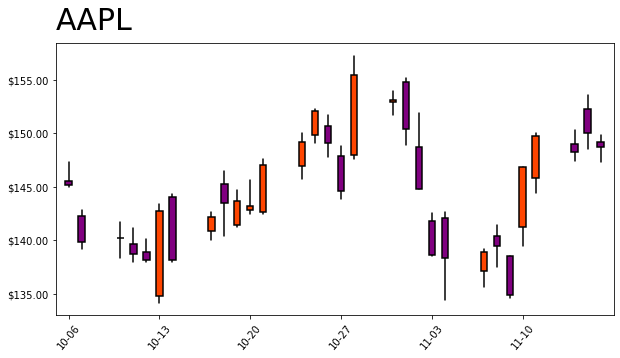

In [12]:
# Create figure and axes
fig = plt.figure(figsize=(10, 5), facecolor='white')
ax = fig.add_subplot(111)

# Colors for candlesticks
colors = ['#ff4500', '#800080']

# Grid lines
ax.grid(linestyle='-', linewidth=2, color='white', zorder=1)

# Draw candlesticks
ax = draw_all_candlesticks(ax, tkr_history, colors[0], colors[1])

# Set ticks to every 5th day
ax.set_xticks(list(tkr_history['day_num'])[::5])
ax.set_xticklabels(list(tkr_history['Date'].dt.strftime('%m-%d'))[::5])
plt.xticks(rotation=50)

# Add dollar signs
formatter = mpl.ticker.FormatStrFormatter('$%.2f')
ax.yaxis.set_major_formatter(formatter)

# Append ticker symbol
ax.text(0, 1.05, tkr_str, va='baseline', ha='left', size=30, transform=ax.transAxes)

# Set axis limits
ax.set_xlim(-1, tkr_history['day_num'].iloc[-1] + 1)

# Show plot
plt.show()